In [4]:
%matplotlib inline
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
import surfdist as sd
from surfdist import viz, load, utils, surfdist

In [5]:
# load surface data and other variables
cmap = 'coolwarm'
base_dir = '/Applications/freesurfer/subjects/'
surf = nib.freesurfer.read_geometry(os.path.join(base_dir, 'bert/surf/lh.pial'))
cort = np.sort(nib.freesurfer.read_label(os.path.join(base_dir, 'bert/label/lh.cortex.label')))
sulc = nib.freesurfer.read_morph_data(os.path.join(base_dir, 'bert/surf/lh.sulc'))

# Calculate and display distance from central sulcus at each node:

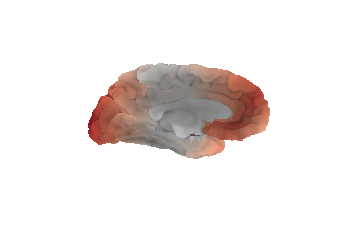

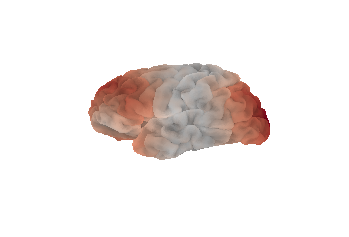

In [6]:
# load central sulcus nodes
region = 'S_central'
src  = sd.load.load_freesurfer_label(os.path.join(base_dir, 'bert/label/lh.aparc.a2009s.annot'), region, cort)

# calculate distance
dist = sd.surfdist.dist_calc(surf, cort, src)

# visualize
plot_med = sd.viz.viz(surf[0], surf[1], dist, bg_map=sulc, bg_on_stat=True, cmap=cmap)
plot_lat = sd.viz.viz(surf[0], surf[1], dist, azim=180, bg_map=sulc, bg_on_stat=True, cmap=cmap)

# Calculate distances on native surface and display on fsaverage

In [ ]:
# load fsaverage4 
fsa4 = nib.freesurfer.read_geometry(os.path.join(base_dir,'fsaverage4/surf/lh.sphere.reg'))[0]
fsa4_sulc = nib.freesurfer.read_morph_data(os.path.join(base_dir, 'fsaverage4/surf/lh.sulc'))
fsa4_cort = np.sort(nib.freesurfer.read_label(os.path.join(base_dir, 'fsaverage4/label/lh.cortex.label')))
native = nib.freesurfer.read_geometry(os.path.join(base_dir, 'bert/surf/lh.sphere.reg'))[0]

# get corresponding nodes between native and fsaverage4
idx_fsa4_to_native = sd.utils.find_node_match(fsa4, native)[0]

# visualize results on fsaverage4 surface
surf_fsa4 = nib.freesurfer.read_geometry(os.path.join(base_dir, 'fsaverage4/surf/lh.pial'))

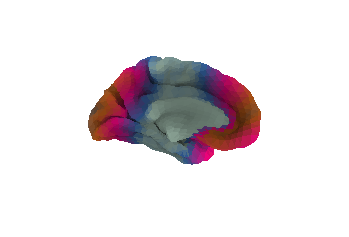

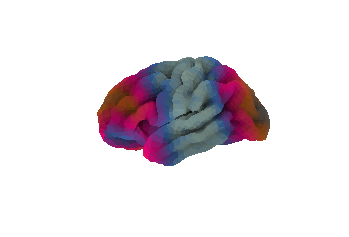

In [95]:
plot_fsa4_med = sd.viz.viz(surf_fsa4[0], surf_fsa4[1], dist[idx_fsa4_to_native], bg_map=fsa4_sulc, bg_on_stat=True, cmap='Accent')
plot_fsa4_lat = sd.viz.viz(surf_fsa4[0], surf_fsa4[1], dist[idx_fsa4_to_native], azim=180, bg_map=fsa4_sulc, bg_on_stat=True, cmap='Accent')

plt.show()

In [71]:
fsa4_cort

array([   0,    1,    2, ..., 2559, 2560, 2561])

# Find zones closest to central sulcus or calcarine sulcus

In [129]:
# load central sulcus nodes
regions = ['S_central', 'S_calcarine']
del src
src = []
for r in regions:
    src.append(sd.load.load_freesurfer_label(os.path.join(base_dir, 'fsaverage4/label/lh.aparc.a2009s.annot'), r, fsa4_cort))



In [124]:

def zone_calc1(surf, cortex, src):
    """
    Calculate closest nodes to each source node using exact geodesic distance along the cortical surface.
    """
    import gdist
    
    
    vertices, triangles = sd.utils.surf_keep_cortex(surf, cortex)
    
    dist_vals = np.zeros((len(src), len(vertices)))
    
    for x in range(len(src)):        
        dist_vals[x, :] = gdist.compute_gdist(vertices, triangles,
                                              source_indices=src_new)

    data = np.argsort(dist_vals, axis=0)[0, :] + 1

    zone = sd.utils.recort(data, surf, cortex)

    #del data

    return zone, dist_vals


In [119]:
range(len(src))

[0, 1]

In [125]:
# calculate zones
zone, dist_vals = zone_calc1(surf_fsa4, fsa4_cort, src)

In [127]:
zone = np.sort(dist_vals, axis=0)[0, :]
zone = sd.utils.recort(zone, surf_fsa4, fsa4_cort)

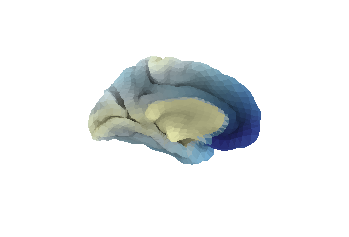

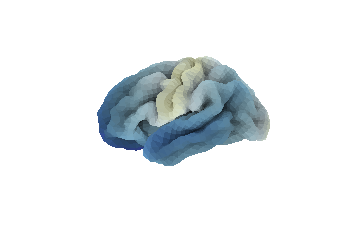

In [128]:
#zone = sd.surfdist.dist_calc(surf_fsa4, fsa4_cort, src[1])
plot_fsa4_med = sd.viz.viz(surf_fsa4[0], surf_fsa4[1], zone, bg_map=fsa4_sulc, bg_on_stat=True, cmap='RdYlBu', symmetric_cbar=False, )
plot_fsa4_lat = sd.viz.viz(surf_fsa4[0], surf_fsa4[1], zone, azim=180, bg_map=fsa4_sulc, bg_on_stat=True, cmap='RdYlBu')
plt.show()

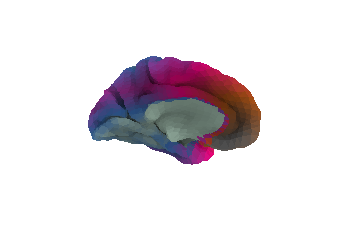

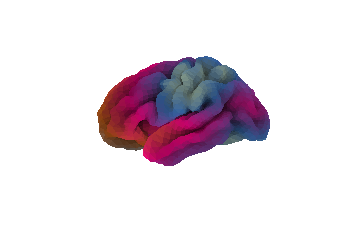

In [105]:
zone = sd.surfdist.dist_calc(surf_fsa4, fsa4_cort, src[0])

plot_fsa4_med = sd.viz.viz(surf_fsa4[0], surf_fsa4[1], zone, bg_map=fsa4_sulc, bg_on_stat=True, cmap='Accent', symmetric_cbar=False, )
plot_fsa4_lat = sd.viz.viz(surf_fsa4[0], surf_fsa4[1], zone, azim=180, bg_map=fsa4_sulc, bg_on_stat=True, cmap='Accent')
plt.show()

In [110]:
len(zone)

2562

In [116]:
np.max(fsa4_cort)

2561